# Part 1: Cellular Automata Model

## 1.1 Characteristics of forest fires

The objective of this model is to present discrete computational models capable of simulating wildfire phenomena. In case of researching the spreading of the wildfire, we are researching the spreading pattern of the wildfire and we think it is pretty similar with the Cellular Automata SIR (CASIR) Model to make the simulation of the wildfire spreading. In a forested area, if a tree catches fire, it can cause surrounding trees to catch fire, and, finally, affects the whole forest. And in the Cellular Automata SIR (CASIR) Model, A stochastic cellular automata (CA) model is proposed to simulate susceptible infected-removed populations over space and time. Three initial grid configurations are used to compare and contrast the spatiotemporal dynamics of this system: random, center, and patchy.\cite{landguth2007cellular} In the model, the S represents the the number of susceptible people, I represents the number of people infected, and R represents the number of people who have recovered.  


## 1.2 Conceptual Model
### Key features of the Cellular Automata SIR model:

    1.Divide system space into cells
    2.Each cell can be in one of several finite states. In this tutorial the states are:

$$ X_t(i,j)=\left\{
\begin{array}{rcl}
0       &      & Unburned\\
1     &      & Burning\\
-1     &      & Burned
\end{array} \right. $$

    3. a discrete dynamical system that consists of a regular network of finite state automata (cells) by
        applying some deterministic or probabilistic transformation rule,such as Game-of-life by John Conway.
        Here, the rule are based on the possibility of plants the fire and death in each generation based on 
        the neighbors and coditions.
    4. All cells are affected simultaneously in a generation, and rules are reapplied over many generations.
    5. The local cells’ states change depending on the states of their neighbors. 
    6. The process is repeated at discrete time steps
    7. The  advantages of the cellular automata do not have restrictions in the type of elementary entities 
        or transformation rules employed.     
    8. They can map such different situations as the distribution of the values of state variables in a simple 
        finite difference simulation. 

### We make following assumption in order to simplify our simulation model:

[a.] In the fire season, any plants will stop growth, migration and death with other reasons.

[b.] we will calculate the wildfire serious in a specific area by the brightness of the fire  

[c.] Assume we use the hour as the time unit and each hour we calculate the serious level of 
the wildfire of the specific area by calculating the average of the brightness of this area.

[d.]We assume the fire speed per hour is $\gamma$, the extinguish speed  per hour is $\lambda$

[e.]We assume the forest is a square


## Basic Knowledge of Model
The fire-spread model is based on Rothermel’s surface fire-spread model. If the all forest looks as 1 part, then $S(t)+ I(t) + R(t) = 1$. And we defined $R_0$ represents the rate of spread on a flat terrain with no wind. The direction of maximum spread is obtained through a vectorial summation of the dimensionless coefficients for wind speed and slope. Assuming the fire origin to be located at the rear focus of the ellipse, the fire-spread rate can be calculated based on the angle $\theta$, measured from the direction of maximum spread.($\overline{E}$ is the ellipse eccentricity, defined as $1 + 1/LW^2$).

$R(\theta)=R_0\frac{(1+ \overline{E}cos(\theta))}{1+\overline{E}}$ 

$LW= 0.936e^{50.5U_{eq}/100} + 0.461e^{−30.5U_{eq}/100} − 0.397$

In which $U_eq$ is the wind speed that alone would produce the combined effect of actual wind and terrain slope.

## Parameters of the system

The parameters that control the behavior of our system are listed below. Some of these parameter describe our system overall, and some are specific to the fire in our system.

$w$ : the width and length of the forest
$$$$
$Time$ : timestamp
$$$$
$duration$ : time difference.
$$$$
$windspeed$ : At time T, the wind speed in environment
$$$$
$winddirection$ : At time T, the wind direction in environment.
$$$$
$livep$ : The possible of the forest have live plants at begin
$$$$
$empty$ : The possible of the forest have empty space at begin
$$$$
$fireoff$ : the possible fire off automatically
$$$$
$centerw$ : The center location of the forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Every cell of  G  is a position that is either empty, firing, or unfired.

The cells of the grid are represented with values as below

In [2]:
Unfired = 0
FIRING = 1
Death = -1

Each cell have space of 1*1, and the possible of the live plants at the begining is 0.96 and the empty space at the begining is 0.04. The $P_{plantbegin} + P_{emptybegin} = 1$.

In [3]:
w = 33
wind_speed = 0
wind_direction = 'e'
Time = 240
center_w = int(w/2 +1)
duration = 1
livep = 1
empty = 1 - livep
fireoff = 0.2

To store the grid, we will use a 2-D Numpy array (G) and initialize the grid with 96% plants, 4% empty.  We set the Orginal situation as G and make model on the M. The fire will begin at the center of the forest. In the fire simulation, $P_{firing} + P_{unfired} + P_{empty} = 1$.

In [4]:
def create_grid (w, wind_speed, wind_direction, Time, duration, livep,fireoff):
    ### INITIALIZE GRID
    center_w = int(w/2 +1)
    empty = 1- livep
    G = Unfired * np.zeros ((w, w), dtype=int)
    M = Unfired * np.zeros ((w, w), dtype=int)
    #RANDOMLY ASSIGN VALUE 0,1,-1 TO EACH CELL WITH PROB 0.25,0.50,0.25
    for i in range(0,w):
        for j in range(0,w):
            G[i][j]=np.random.choice([0,-1],p=[livep,empty])
            if(G[i][j]!=0):
                M[i][j]= -1
            if (i== center_w and j== center_w):
                M[i][j] = 1
    return G,M, w, wind_speed, wind_direction, Time, duration, livep, empty,fireoff

Draw initial system

In [5]:
def show_grid ( G,i=1):
    u, count = np.unique(G, return_counts=True)
    if len(count) == 3:
        cmap = mpl.colors.ListedColormap(['skyblue','teal','crimson'])
    elif len(count) == 2:
        cmap = mpl.colors.ListedColormap([ 'teal', 'crimson'])
    else:
        cmap = mpl.colors.ListedColormap(['teal'])
    sns.set(style="white")

    plt.matshow(G,cmap=cmap)
    cb = plt.colorbar ()
    plt.axis ('square')

    plt.axis ([0, w-1, w-1,0])

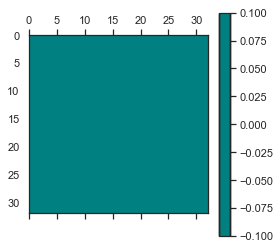

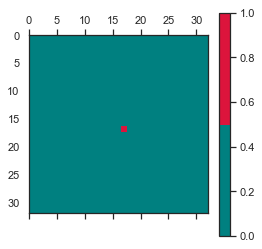

In [6]:
G1,M1,w, wind_speed, wind_direction, Time, duration, livep, empty,fireoff = create_grid(w, wind_speed, wind_direction, Time, duration, livep, fireoff)
show_grid(G1)
show_grid(M1)

Update the wind influence of the fire spread with the basic knowledge above

In [7]:
def update_wind(direction):
    LW = 0.936 * np.e ** (50.5* wind_speed/100) + 0.461 * np.e ** (-30.5 * wind_speed/100) - 0.397
    E = 1 - 1/LW**2
    theta = 0 
    k = 1/(1+E)
    if wind_direction.lower() == 'e':
        return k*(1+E*math.cos(0-direction))
    elif wind_direction.lower() == 'ne':
        return k*(1+E*math.cos(np.pi/4-direction))
    elif wind_direction.lower() == 'n':
        return k*(1+E*math.cos(np.pi/2-direction))
    elif wind_direction.lower() == 'nw':
        return k*(1+E*math.cos(3 * np.pi/4-direction))
    elif wind_direction.lower() == 'w':
        return k*(1+E*math.cos(np.pi-direction))
    elif wind_direction.lower() == 'sw':
        return k*(1+E*math.cos(5 * np.pi/4-direction))
    elif wind_direction.lower() == 's':
        return k*(1+E*math.cos(3 * np.pi/2-direction))
    elif wind_direction.lower() == 'se':
        return k*(1+E*math.cos(7 * np.pi/4-direction))

#rule1: if cells contains fire, the rule is as follow:

If >=6 neighbors are firing, fire off
If the neighbors is firing, the neighbor fire have 1% possible to off by itself
If the neighbors is plants, the plants will be fire with the possible of the 70% multiple the wind influence 

In [8]:
def fire_process(M0, i, j):
    xMin=max(i-1,0)
    xMax=min(i+1,w-1)
    yMin=max(j-1,0)
    yMax=min(j+1,w-1)
    count = 0
    for a in range(xMin,xMax + 1):
        for b in range(yMin, yMax + 1):
            if a == i and  b == j:
                pass
            else:
                if M0[a][b] == -1:
                    pass
                elif M0[a][b] == 0:
                    if a-i == 1 and b == j:
                        direction = np.pi/2
                    elif a - i == -1 and b == j:
                        direction = 3 * np.pi
                    elif a == i and b - j == 1:
                        direction = 0
                    elif a == i and b - j ==-1:
                        direction = np.pi
                    elif a - i == 1 and b - j == 1:
                        direction = np.pi/4
                    elif a - i == -1 and b - j == 1:
                        direction = np.pi/4 * 7
                    elif a - i == 1 and b - j == -1:
                        direction = np.pi/4 * 3
                    elif a - i == -1 and b - j == -1:
                        direction = np.pi/4 * 5
                    possible = 0.7 * update_wind(direction)
                    M0[a][b] = np.random.choice([1,0],p=[possible, 1- possible])
                elif M0[a][b] == 1:
                    count += 1
                    possible_death = 0.5
                    M0[a][b] = np.random.choice([-1,0],p=[possible_death, 1- possible_death]) 
    if count >= 6:
        M0[i][j] = -1
    return M0

#rule2: if the cell contains empty, the rule is as follows:

Do nothing

In [9]:
def empty_process(M0, i, j):
    return M0

#rule3: if the cell contains empty, the rule is as follows:

If >= 3 neighbors are firing, plant firing
If <3 neighbors are firing, plant have 50% firing 

In [10]:
def plant_process(M0, i, j):
    xMin=max(i-1,0)
    xMax=min(i+1,w-1)
    yMin=max(j-1,0)
    yMax=min(j+1,w-1)
    count = 0
    for a in range(xMin,xMax + 1):
        for b in range(yMin, yMax + 1):
            if a == i and  b == j:
                pass
            else:
                if M0[a][b] == -1:
                    pass
                elif M0[a][b] == 0:
                    pass
                elif M0[a][b] == 1:
                    count += 1
    if count >= 3:
        M0[i][j] = 1
    else:
        np.random.choice([1,0],p=[0.5, 0.5])  
    return M0

We now shold out the one step of simulation for firing, unfire and empty situation. Iterating through all neighboring cells for each cell takes  O(N2)  time, since we have  N2  cells and check a constant number neighbors. We also have to account for whether there are fixed boundaries (no wraparound) or modular boundaries (grid wraps around horizontally and vertically).

In [11]:
def step(M):
    fire_point = []
    empty_point = []
    plant_point = []
    M_t = M.copy ()
    for i in range(w):
        for j in range(w):
            if M_t[i][j] == 1:
                fire_point.append((i,j))
            elif M_t[i][j] == 0:
                plant_point.append((i,j))
            elif M_t[i][j] == -1:
                empty_point.append((i,j))
    for k in range(len(empty_point)):
        s = empty_point[k]
        M_t = empty_process(M_t,s[0], s[1])
        
    for k in range(len(plant_point)):
        s = plant_point[k]
        M_t = plant_process(M_t,s[0], s[1])
        
    for k in range(len(fire_point)):
        s = fire_point[k]
        M_t = fire_process(M_t,s[0], s[1])
    return M_t

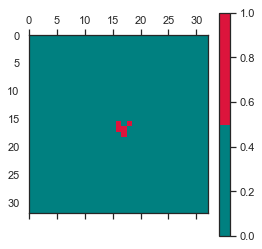

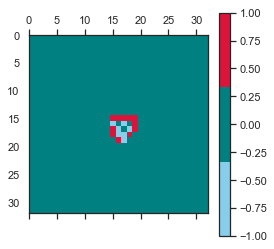

In [12]:
G_0,M_0, w, wind_speed, wind_direction, Time, duration, livep, empty,fireoff = create_grid (w, wind_speed, wind_direction, Time, duration, livep, fireoff)
M_1 = step (M_0)
show_grid(M_1)
M_2 = step (M_1)
show_grid(M_2)

The preceding code lays the building blocks for the complete simulation, which the following function implements.

In [13]:
def sim(M):
    #make the simulation at the system set time
    Nstep = Time
    t, M_t = 0, M.copy ()
    while t < Nstep:
        M_t = step(M)
        t = t + duration
    return (t, M_t)

The preceding code lays the building blocks for the specific step simulation, which the following function implements.

In [14]:
def sim_once(M, Nstep):
    #make more steps of the simualtion
    S = np.zeros (Nstep+1)
    I = np.zeros (Nstep+1)
    R = np.zeros (Nstep+1)
    t, M_t = 0, M.copy ()
    while t < Nstep:
        M_t = step(M_t)
        S[t] = np.count_nonzero(M_t == 0)
        I[t] = np.count_nonzero(M_t == 1)
        R[t] = np.count_nonzero(M_t == -1)
        t = t + duration
    return t,S,I, R, M_t

Display the simulation result:

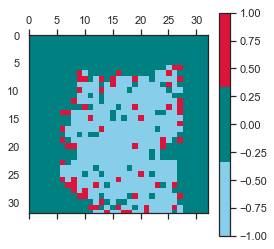

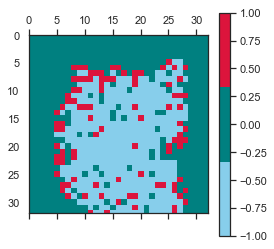

In [15]:
G1,M1, w, wind_speed, wind_direction, Time, duration, livep, empty,fireoff = create_grid(w, wind_speed, wind_direction, Time, duration, livep, fireoff)
t,S,I, R, M_t = sim_once(M1, 11)
show_grid(M_t)
t,S,I, R, M_t1 = sim_once(M_t, 1)
show_grid(M_t1)

In [16]:
nIters = 1
I = np.zeros ((52, nIters))
S = np.zeros ((52, nIters))
R = np.zeros ((52, nIters))

T_stop = np.zeros (nIters)

In [17]:
G1,M1,w, wind_speed, wind_direction, Time, duration, livep, empty,fireoff = create_grid(w, wind_speed, wind_direction, Time, duration, livep, fireoff)
for k in range (nIters): # Loop over simulations
    T_stop[k], S[:, k], I[:, k], R[:,k], M_t = sim_once (M1, 51)

Text(0.5,1,'SIR (% ofSpace)')

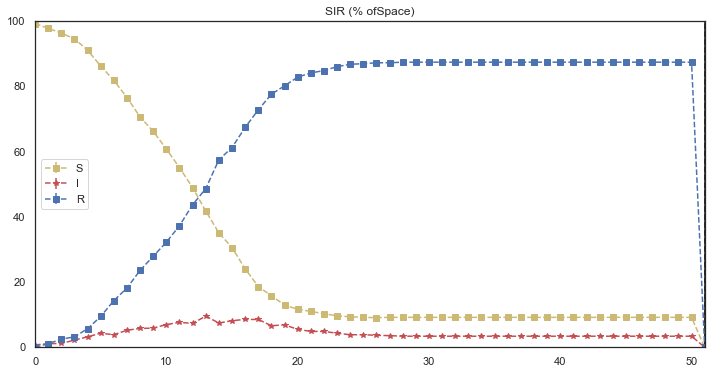

In [18]:
# This code cell helps you visualize your results.

# Computes the averages, $(\bar{S_t}, \bar{I_t}, \bar{R_t})$.
S_avg = np.mean (S, axis=1)
I_avg = np.mean (I, axis=1)
R_avg = np.mean (R, axis=1)
t_stop_avg = np.mean (T_stop)

S_std = np.std (S, axis=1)
I_std = np.std (I, axis=1)
R_std = np.std (R, axis=1)
t_stop_std = np.std (T_stop)

T = np.arange (52)
fig = plt.figure (figsize=(12, 6))
SCALE = 1e2 / (33**2)
plt.errorbar (T, S_avg*SCALE, yerr=S_std*SCALE, fmt='ys--', label = 'S')
plt.errorbar (T, I_avg*SCALE, yerr=I_std*SCALE, fmt='r*--', label = 'I')
plt.errorbar (T, R_avg*SCALE, yerr=R_std*SCALE, fmt='bs--', label  = 'R')
plt.plot ([t_stop_avg, t_stop_avg], [0., 100.], 'k-')
plt.plot ([t_stop_avg-t_stop_std, t_stop_avg-t_stop_std], [0., 100.], 'k--')
plt.axis ([0, 51, 0.0, 100.0])
plt.legend ()
plt.title ("SIR (% ofSpace)")


## If there exist some place which is empty at begin

set the emptyp = 0.25

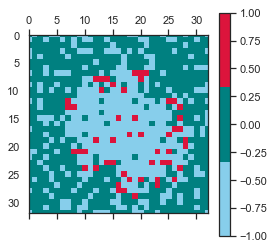

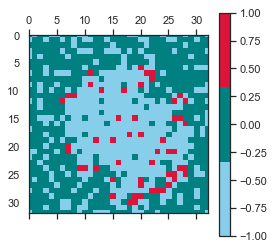

In [19]:
livep = 0.75
G1,M1, w, wind_speed, wind_direction, Time, duration, livep, empty,fireoff = create_grid(w, wind_speed, wind_direction, Time, duration, livep, fireoff)
t,S,I, R, M_t = sim_once(M1, 11)
show_grid(M_t)
t,S,I, R, M_t1 = sim_once(M_t, 1)
show_grid(M_t1)


In [20]:
nIters = 1
I = np.zeros ((52, nIters))
S = np.zeros ((52, nIters))
R = np.zeros ((52, nIters))

T_stop = np.zeros (nIters)

In [21]:
livep = 0.75
G1,M1, w, wind_speed, wind_direction, Time, duration, livep, empty,fireoff = create_grid(w, wind_speed, wind_direction, Time, duration, livep, fireoff)
for k in range (nIters): # Loop over simulations
    T_stop[k], S[:, k], I[:, k], R[:,k], M_t = sim_once (M1, 51)

Text(0.5,1,'SIR (% ofSpace)')

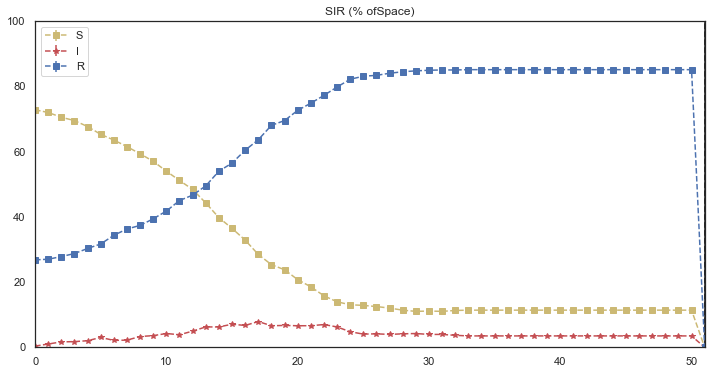

In [22]:
# This code cell helps you visualize your results.

# Computes the averages, $(\bar{S_t}, \bar{I_t}, \bar{R_t})$.
S_avg = np.mean (S, axis=1)
I_avg = np.mean (I, axis=1)
R_avg = np.mean (R, axis=1)
t_stop_avg = np.mean (T_stop)

S_std = np.std (S, axis=1)
I_std = np.std (I, axis=1)
R_std = np.std (R, axis=1)
t_stop_std = np.std (T_stop)

T = np.arange (52)
fig = plt.figure (figsize=(12, 6))
SCALE = 1e2 / (33**2)
plt.errorbar (T, S_avg*SCALE, yerr=S_std*SCALE, fmt='ys--', label = 'S')
plt.errorbar (T, I_avg*SCALE, yerr=I_std*SCALE, fmt='r*--', label = 'I')
plt.errorbar (T, R_avg*SCALE, yerr=R_std*SCALE, fmt='bs--', label  = 'R')
plt.plot ([t_stop_avg, t_stop_avg], [0., 100.], 'k-')
plt.plot ([t_stop_avg-t_stop_std, t_stop_avg-t_stop_std], [0., 100.], 'k--')
plt.axis ([0, 51, 0.0, 100.0])
plt.legend ()
plt.title ("SIR (% ofSpace)")


## Conclusion
Frome the analysis of the SIRCA Model we create, we observed the pecentage of the plants which not fired will decrease and the firing plants percentage will first increase then decrease, for the plants fired and empty their percentage will increase. It is reasonable because it must have some fire still will not catch off if there are no fireman and rain weather enroll and there are also exist some plants which the surrounding are empty and the fire cannot fire this plant. Also we find with the empty rate at begin increase, the fire rate will decrease and there are more plants will left after the fire. The results are differnt from what we observed in ODEs tutorial where the firing population dynamics exhibited periodic motion. This can be attributed to the limited space and other constraints of the Cellular Automation Model.